In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df_anime=pd.read_csv("anime.csv")
df_anime.head()

,anime_id,title,score,rank,popularity,members,synopsis,start_date,end_date,type,episodes,image_url
0,28977,Gintama°,9.05,8,347,680037,"Gintoki, Shinpachi, and Kagura return as the f...",2015-01-01,2016-01-01,TV,51.0,https://cdn.myanimelist.net/images/anime/3/720...
1,57555,Chainsaw Man Movie: Reze-hen,9.18,2,962,282129,Sequel to Chainsaw Man .,2025-01-01,2025-01-01,Movie,1.0,https://cdn.myanimelist.net/images/anime/1763/...
2,11061,Hunter x Hunter (2011),9.03,9,8,3107455,Hunters devote themselves to accomplishing haz...,2011-01-01,2014-01-01,TV,148.0,https://cdn.myanimelist.net/images/anime/1337/...
3,52991,Sousou no Frieren,9.29,1,121,1269074,During their decade-long quest to defeat the D...,2023-01-01,2024-01-01,TV,28.0,https://cdn.myanimelist.net/images/anime/1015/...
4,9969,Gintama',9.02,11,406,601940,"After a one-year hiatus, Shinpachi Shimura ret...",2011-01-01,2012-01-01,TV,51.0,https://cdn.myanimelist.net/images/anime/4/503...


In [18]:
df_anime.shape

(10000, 12)

In [19]:
df_anime.columns

Index(['anime_id', 'title', 'score', 'rank', 'popularity', 'members',
       'synopsis', 'start_date', 'end_date', 'type', 'episodes', 'image_url'],
      dtype='object')

In [20]:
df_anime.isna().sum()

anime_id       0
title          0
score          0
rank           0
popularity     0
members        0
synopsis       2
start_date     2
end_date      84
type           0
episodes      48
image_url      0
dtype: int64

As you can see, the columns synopsis, start_data, end_data, and episodes contain missing/Nan values of the anime dataset.  

In [21]:
df_anime['synopsis'] = df_anime['synopsis'].fillna("Not Available")
df_anime.head()

,anime_id,title,score,rank,popularity,members,synopsis,start_date,end_date,type,episodes,image_url
0,28977,Gintama°,9.05,8,347,680037,"Gintoki, Shinpachi, and Kagura return as the f...",2015-01-01,2016-01-01,TV,51.0,https://cdn.myanimelist.net/images/anime/3/720...
1,57555,Chainsaw Man Movie: Reze-hen,9.18,2,962,282129,Sequel to Chainsaw Man .,2025-01-01,2025-01-01,Movie,1.0,https://cdn.myanimelist.net/images/anime/1763/...
2,11061,Hunter x Hunter (2011),9.03,9,8,3107455,Hunters devote themselves to accomplishing haz...,2011-01-01,2014-01-01,TV,148.0,https://cdn.myanimelist.net/images/anime/1337/...
3,52991,Sousou no Frieren,9.29,1,121,1269074,During their decade-long quest to defeat the D...,2023-01-01,2024-01-01,TV,28.0,https://cdn.myanimelist.net/images/anime/1015/...
4,9969,Gintama',9.02,11,406,601940,"After a one-year hiatus, Shinpachi Shimura ret...",2011-01-01,2012-01-01,TV,51.0,https://cdn.myanimelist.net/images/anime/4/503...


Here, the synopsis missing values are filled with "Not Available" because there are only 2 missing values. So, this won't have much effect.

In [22]:
df_anime['episodes'] = df_anime['episodes'].fillna(df_anime.groupby('type')['episodes'].transform('median'))
df_anime.head()

,anime_id,title,score,rank,popularity,members,synopsis,start_date,end_date,type,episodes,image_url
0,28977,Gintama°,9.05,8,347,680037,"Gintoki, Shinpachi, and Kagura return as the f...",2015-01-01,2016-01-01,TV,51.0,https://cdn.myanimelist.net/images/anime/3/720...
1,57555,Chainsaw Man Movie: Reze-hen,9.18,2,962,282129,Sequel to Chainsaw Man .,2025-01-01,2025-01-01,Movie,1.0,https://cdn.myanimelist.net/images/anime/1763/...
2,11061,Hunter x Hunter (2011),9.03,9,8,3107455,Hunters devote themselves to accomplishing haz...,2011-01-01,2014-01-01,TV,148.0,https://cdn.myanimelist.net/images/anime/1337/...
3,52991,Sousou no Frieren,9.29,1,121,1269074,During their decade-long quest to defeat the D...,2023-01-01,2024-01-01,TV,28.0,https://cdn.myanimelist.net/images/anime/1015/...
4,9969,Gintama',9.02,11,406,601940,"After a one-year hiatus, Shinpachi Shimura ret...",2011-01-01,2012-01-01,TV,51.0,https://cdn.myanimelist.net/images/anime/4/503...


To handle missing episode values, the median of the respective type (TV, movies, specials, TV specials, ONA, OVA) is used. This approach provides a balanced and reliable estimate, maintaining the integrity of the dataset for further analysis.

In [23]:
df_anime.isna().sum()

anime_id       0
title          0
score          0
rank           0
popularity     0
members        0
synopsis       0
start_date     2
end_date      84
type           0
episodes       0
image_url      0
dtype: int64

In [24]:
numeric_df1 = df_anime.select_dtypes(include='number')
numeric_df1.head()

,anime_id,score,rank,popularity,members,episodes
0,28977,9.05,8,347,680037,51.0
1,57555,9.18,2,962,282129,1.0
2,11061,9.03,9,8,3107455,148.0
3,52991,9.29,1,121,1269074,28.0
4,9969,9.02,11,406,601940,51.0


Only the numeric data type columns are separated into another DataFrame (numeric_df1) from the df_anime DataFrame. This is for performing different operations like statistical analysis, visualisation and some other. 

In [25]:
numeric_df1.describe()

,anime_id,score,rank,popularity,members,episodes
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,24129.128000,6.980589,5000.494000,6490.903700,1.075309e+05,15.679700
std,19948.188153,0.619406,2886.898727,4646.309341,2.733514e+05,41.767264
min,1.000000,6.050000,1.000000,1.000000,2.260000e+02,1.000000
25%,4055.500000,6.470000,2500.750000,2591.750000,4.270250e+03,1.000000
50%,21406.000000,6.900000,5000.500000,5564.500000,1.817900e+04,11.000000
75%,40028.750000,7.390000,7500.250000,9824.250000,8.469275e+04,13.000000
max,62863.000000,9.290000,10000.000000,22184.000000,4.262220e+06,1787.000000


Here, we used a pre-defined function describe() that results in a dataframe of a statistical overview for the numeric_df1.

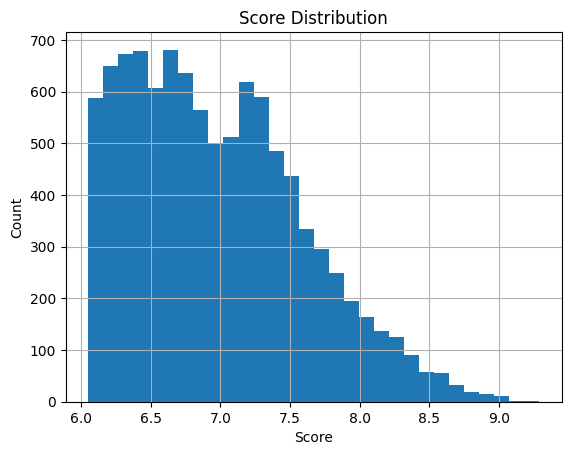

In [26]:
numeric_df1['score'].hist(bins=30)
plt.title("Score Distribution")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()


The score distribution is right-skewed, with most values concentrated between 6.0 and 7.5 and peaking around 6.3–6.5. Higher scores occur less frequently, indicating that moderate scores dominate the dataset.

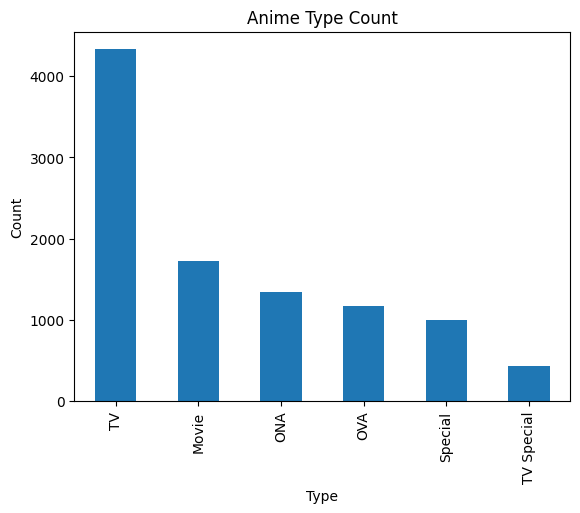

In [27]:
df_anime['type'].value_counts().plot(kind='bar')
plt.title("Anime Type Count")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


TV anime ranks high in the dataset, showing the highest count compared to other formats. Movies and ONAs follow, while OVAs, Specials, and TV Specials occur less frequently. This indicates that TV series are the most common and popular type of anime, with other formats contributing in smaller proportions.TV Special is down to the x-axis. This indicates that there is very little interest in the audience

In [28]:
df_anime.sort_values(by='score', ascending=False)[['title','score']].head(10)

,title,score
3,Sousou no Frieren,9.29
1,Chainsaw Man Movie: Reze-hen,9.18
10,Fullmetal Alchemist: Brotherhood,9.10
28,Steins;Gate,9.07
19,Kingdom 6th Season,9.06
6,Gintama: The Final,9.05
7,Shingeki no Kyojin Season 3 Part 2,9.05
0,Gintama°,9.05
2,Hunter x Hunter (2011),9.03
16,Ginga Eiyuu Densetsu,9.02


The top-ranked anime titles all achieve high scores above 9.0, reflecting strong audience approval and critical acclaim. Series like Sousou no Frieren, Chainsaw Man Movie: Reze-hen, and Fullmetal Alchemist: Brotherhood lead the list, showing their popularity and impact.

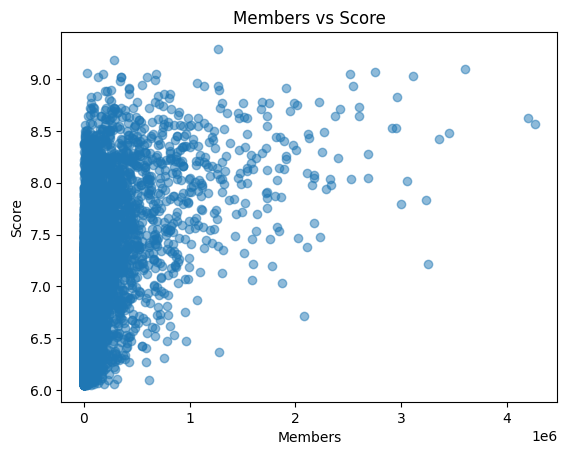

In [29]:
plt.scatter(df_anime['members'], df_anime['score'], alpha=0.5)
plt.title("Members vs Score")
plt.xlabel("Members")
plt.ylabel("Score")
plt.show()


The scatter plot shows that most anime have relatively few members, with scores clustering between 7.0 and 8.5. As membership increases, the data points become more spread out, but scores remain varied. This indicates that popularity (number of members) does not strongly determine score, though highly popular titles still tend to maintain solid ratings.

In [32]:
df_anime['start_date'] = pd.to_datetime(df_anime['start_date'], errors='coerce')
df_anime['end_date'] = pd.to_datetime(df_anime['end_date'], errors='coerce')


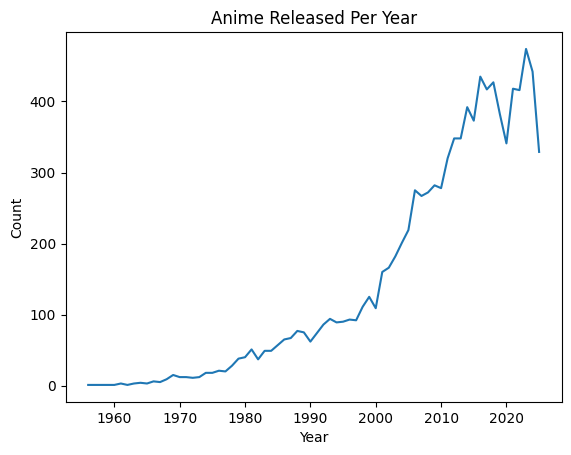

In [33]:
df_anime['start_year'] = df_anime['start_date'].dt.year
df_anime['start_year'].value_counts().sort_index().plot(kind='line')
plt.title("Anime Released Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


The number of anime releases has steadily grown from the 1950s, with a sharp rise after 2000. The industry peaked around 2018–2020, showing its highest output, followed by a decline in recent years. This trend reflects both the expansion and later slowdown of anime production over time.

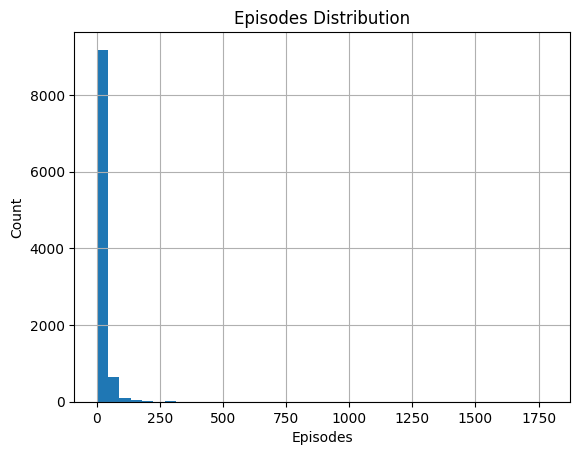

In [34]:
df_anime['episodes'].hist(bins=40)
plt.title("Episodes Distribution")
plt.xlabel("Episodes")
plt.ylabel("Count")
plt.show()


The episode distribution is heavily skewed toward lower counts, with most anime having very few episodes. Since this pattern is expected and not particularly insightful, it is not a major point of observation for deeper analysis.

In [40]:
df_anime['synopsis_length'] = df_anime['synopsis'].astype(str).apply(len)
df_anime['synopsis_length'].head(10)

0    1197
1      24
2     882
3    1090
4    1104
5     823
6     876
7     853
8    1029
9     995
Name: synopsis_length, dtype: int64

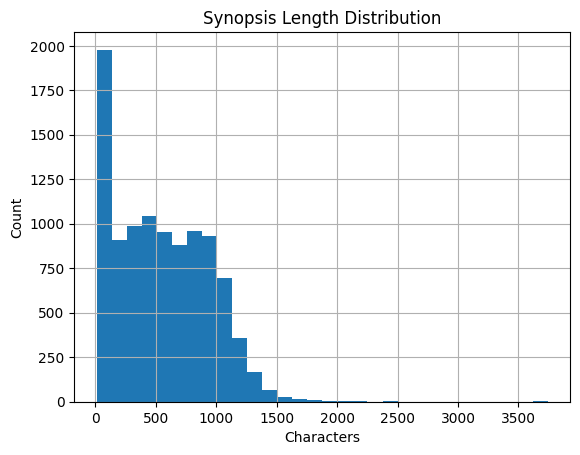

In [41]:
df_anime['synopsis_length'].hist(bins=30)
plt.title("Synopsis Length Distribution")
plt.xlabel("Characters")
plt.ylabel("Count")
plt.show()


The synopsis length distribution is right-skewed, with most synopses being short (under 500 characters). Longer synopses are less frequent, and very few exceed 2000 characters. This shows that concise descriptions are the norm, while extended synopses are relatively rare.

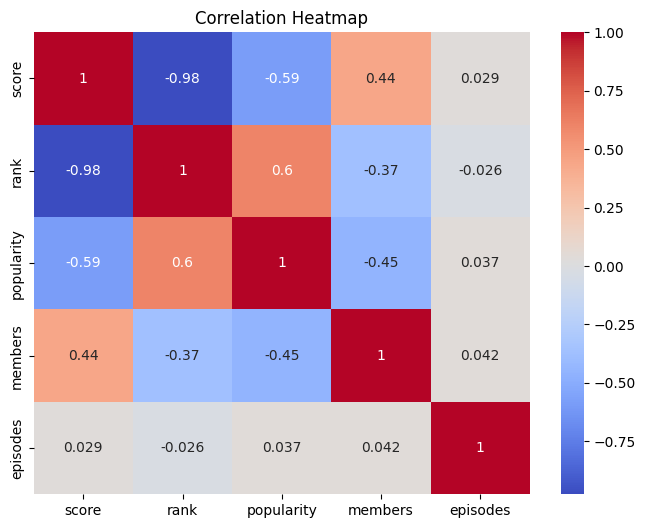

In [48]:
corr = df_anime[['score','rank','popularity','members','episodes']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap shows strong negative correlation between score and rank (-0.98), meaning higher scores are linked to better ranks. Score also has a moderate negative correlation with popularity (-0.59) and a positive correlation with members (0.44), indicating popular titles with more members tend to score higher. Episodes, however, show almost no correlation with score or other variables, suggesting episode count is not an important factor in determining rank, popularity, or ratings.